## Imports

In [145]:
import tkinter
from tkinter import ttk
import sv_ttk
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from DSPTask import AddSignalSamplesAreEqual,Folding,ShiftSignalByConst,MultiplySignalByConst,SubSignalSamplesAreEqual
from QuanTest1 import QuantizationTest1
from QuanTest2 import QuantizationTest2
# Global array to hold the signals
signals = []
sig1 = []
sig2 = []

## Task one Code

In [146]:
# Function to read the signal from the text file
def read_signal():
    file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
    if not file_path:
        return
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    N = int(lines[2].strip())  # First row: number of samples
    indices = []
    values = []
    
    for i in range(3, N + 3):
        parts = lines[i].strip().split()
        indices.append(int(parts[0]))  # Sample index
        values.append(float(parts[1]))  # Sample value

    signals.append([indices, values])
    print(f"Signal {len(signals)} loaded.")
    return 5

def read_signal_2(index):
    global sig1, sig2

    num = read_signal()
    if num:
        if(index==1):
            sig1 = signals[-1]
        elif(index==2):
            sig2 = signals[-1]
    print(sig1,sig2)
    

def plot_signal(signal_index, frame, second_signal_index=None, title=""):
    # Clear the previous plots in the frame
    for widget in frame.winfo_children():
        widget.destroy()

    times = signals[signal_index][0]
    values = signals[signal_index][1]

    # Create the plot using matplotlib
    fig, ax = plt.subplots()

    # Set the figure size based on the frame's dimensions (dynamically)
    fig.set_size_inches((frame.winfo_width() / fig.dpi)-5, (frame.winfo_height() / fig.dpi)-5)

    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')

    ax.stem(times, values, label=f'Signal {signal_index + 1}', linefmt='white', markerfmt='wo')

    if second_signal_index is not None:
        times_2 = signals[second_signal_index][0]
        values_2 = signals[second_signal_index][1]
        ax.stem(times_2, values_2, linefmt='b-', markerfmt='bo', label=f'Signal {second_signal_index + 1}')

    ax.set_xlabel('Index', color='white')
    ax.set_ylabel('Signal Value', color='white')
    ax.set_title(title, color='white')
    ax.tick_params(axis='both', colors='white')  # Set tick color to white
    ax.spines['bottom'].set_color('white')       # Set axis spine color to white
    ax.spines['left'].set_color('white')

    ax.grid(True, color='gray', linestyle='--', alpha=0.5)

    # Set x-axis ticks to integer values
    ax.set_xticks(range(min(times), max(times) + 1))
    ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

    # Apply tight layout to ensure nothing is cut off
    plt.tight_layout()

    # Embed the plot into the Tkinter frame
    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas_widget = canvas.get_tk_widget()

    # Use grid instead of pack and ensure full expansion of canvas
    canvas_widget.grid(row=0, column=0, sticky="nsew")
    
    # Configure the frame's grid layout to allow resizing
    frame.rowconfigure(0, weight=1)
    frame.columnconfigure(0, weight=1)

    # Draw the canvas
    canvas.draw()

    # Make sure the figure does not get cropped
    fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)



# Function to add two signals
def add_signals(signal1_index, signal2_index,frame_before,frame_after):
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[signal2_index]
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")

    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    plot_signal(len(signals) - 1,frame_after,title="Result of Add")

    AddSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)

# Function to multiply a signal by a constant
def multiply_signal(signal_index, constant,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    new_values = [val * constant for val in values]
    signals.append([indices, new_values])
    plot_signal(len(signals) - 1, frame_after,title="Result of Multiply")
    MultiplySignalByConst(5,indices, new_values)


# Function to subtract two signals
def subtract_signals(signal1_index, signal2_index,frame_before,frame_after):
    plot_signal(signal1_index,frame_before,signal2_index,"Signals")
    indices, values = signals[signal2_index]
    new_values = [val * -1 for val in values]
    signals.append([indices, new_values])
    
    indices1, values1 = signals[signal1_index]
    indices2, values2 = signals[len(signals)-1]



    combined_indices = sorted(set(indices1 + indices2))
    combined_values = []

    for idx in combined_indices:
        val1 = values1[indices1.index(idx)] if idx in indices1 else 0
        val2 = values2[indices2.index(idx)] if idx in indices2 else 0
        combined_values.append(val1 + val2)
    
    signals.append([combined_indices, combined_values])
    
    plot_signal(len(signals) - 1, frame_after, title="Suntraction")
    SubSignalSamplesAreEqual("Signal1.txt", "Signal2.txt",combined_indices,combined_values)



# Function to shift a signal by k steps
def shift_signal(signal_index, k,frame_before,frame_after):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    tempk = k*-1
    new_indices = [idx + tempk for idx in indices]
    signals.append([new_indices, values])
    
    plot_signal(len(signals) - 1,frame_after,title="Shifted")
    ShiftSignalByConst(k,new_indices,values)


def fold_signal(signal_index,frame_before,frame_after,):
    indices, values = signals[signal_index]
    plot_signal(signal_index,frame_before,title="Signal")
    
    # Reverse indices by negating and creating a list of (negated index, value) pairs
    pairs = [(-idx, val) for idx, val in zip(indices, values)]
    
    pairs.sort(key=lambda pair: pair[0])
    
    new_indices, new_values = zip(*pairs)  # This unzips the pairs into two lists
    
    signals.append([list(new_indices), list(new_values)])
 
    plot_signal(len(signals) - 1,frame_after,title="Reversed signal")
    Folding(new_indices, new_values)


# Function to save the last generated signal to a text file
def save_signal():
    if not signals:
        print("No signal to save!")
        return
    
    file_path = filedialog.asksaveasfilename(defaultextension=".txt", filetypes=[("Text files", "*.txt")])
    if not file_path:
        return

    indices, values = signals[-1]
    with open(file_path, 'w') as file:
        file.write(f"{len(indices)}\n")
        for idx, val in zip(indices, values):
            file.write(f"{idx} {val}\n")
    print(f"Signal saved to {file_path}")


## Task Two Code

In [147]:


def generate_signal(frame):
    # Retrieve user inputs
    signal_type = signal_type_var.get()
    amplitude = float(amplitude_entry.get())
    phase = float(phase_entry.get())
    analog_freq = float(analog_freq_entry.get())  # f (Hz)
    sampling_freq = float(sampling_freq_entry.get())  # fs (Hz)
    signal_mode = signal_mode_var.get()

    if sampling_freq < 2 * analog_freq:
        print("Sampling frequency must be greater than twice the analog frequency.")
        #return

    duration = 1  # 1 second for visualization

    t = np.linspace(0, duration, int(sampling_freq))

    # Generate the signal based on user input
    if signal_type == 'Sine':
        signal = amplitude * np.sin(2 * np.pi * analog_freq * t + (phase * (np.pi / 180)))
    elif signal_type == 'Cosine':
        signal = amplitude * np.cos(2 * np.pi * analog_freq * t + (phase * (np.pi / 180)))
    else:
        return

    # Clear previous plot if it exists
    for widget in frame.winfo_children():
        widget.destroy()

    # Create a matplotlib figure and add it to the specified frame
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('black')  # Set figure background to black
    ax.set_facecolor('black')         # Set axes background to black

    canvas = FigureCanvasTkAgg(fig, master=frame)
    canvas_widget = canvas.get_tk_widget()

    # Use grid instead of pack to ensure the canvas fits properly within the frame
    canvas_widget.grid(row=0, column=0, sticky="nsew")

    # Configure the frame's grid to make sure the canvas expands
    frame.rowconfigure(0, weight=1)
    frame.columnconfigure(0, weight=1)


    # Plot the signal based on the selected mode
    if signal_mode == 'Continuous':
        ax.plot(t, signal, label=signal_type, color='white')  # Set signal color to white
        ax.axhline(y=0, color='#57c8ff', linewidth=1)
        ax.set_ylim([min(signal) - amplitude * 0.1, max(signal) + amplitude * 0.1])
    elif signal_mode == 'Discrete':
        ax.stem(t, signal, label=signal_type, linefmt='white', markerfmt='wo', basefmt="#57c8ff")  # White lines and markers
    elif signal_mode == 'C&D':
        ax.plot(t, signal, label=signal_type, color='white')  # Continuous plot in white
        ax.stem(t, signal, label=signal_type, linefmt='white', markerfmt='wo', basefmt="#57c8ff")  # Discrete plot in white
    else:
        return

    # Set dark mode for axis labels, grid, and ticks
    ax.set_xlabel('Time (seconds)', color='white') 
    ax.set_ylabel('Amplitude', color='white')       
    ax.tick_params(axis='both', colors='white')     
    ax.spines['bottom'].set_color('white')          
    ax.spines['left'].set_color('white')

    ax.grid(True, color='gray', linestyle='--', alpha=0.5)

    ax.legend(facecolor='black', edgecolor='white', labelcolor='white')

    canvas.draw()


## Task Three Code

In [148]:

def calc_quant():
    # Retrieve user inputs
    user_input = signal_levels_entry.get()
        
    if radio_var.get() == "levels":  # User selected 'levels'
        signal_levels = int(user_input)
    else:  # User selected 'bits'
        bits = int(user_input)
        signal_levels = 2 ** bits

    input_signal = np.array(signals[-1][1])

    min_val, max_val = input_signal.min(), input_signal.max()
    
    # Calculate delta
    delta = (max_val - min_val) / signal_levels

    # ranges and midpoints
    ranges = [min_val + i * delta for i in range(signal_levels + 1)]
    midpoints = [(ranges[i] + ranges[i + 1]) / 2 for i in range(signal_levels)]
    
    # Generate codes
    codes = [format(i, f'0{int(np.log2(signal_levels))}b') for i in range(signal_levels)]

    # Generate indexes
    codes_by_int = [i + 1 for i in range(signal_levels)]

    # Quantization 
    quantized_signal = np.array([min(midpoints, key=lambda x: abs(x - sample)) for sample in input_signal])

    # Map each quantized value to its binary code
    encoding_dict = {midpoints[i]: codes[i] for i in range(signal_levels)}
    encoded_signal = [encoding_dict[q] for q in quantized_signal]

    # Create a mapping from quantized values to their corresponding integer codes
    int_encoding_dict = {midpoints[i]: codes_by_int[i] for i in range(signal_levels)}
    encoded_signal_by_int = [int_encoding_dict[q] for q in quantized_signal]

    # Calculate average power error
    quantization_error =  quantized_signal - input_signal
    average_power_error = np.mean(quantization_error ** 2)

    if radio_Tests.get() == "T1":
        QuantizationTest1("Quan1_Out.txt",encoded_signal, quantized_signal,)
    elif radio_Tests.get() == "T2":
        QuantizationTest2("Quan2_Out.txt",encoded_signal_by_int, encoded_signal, quantized_signal, quantization_error)
    
    for item in tree.get_children():
        tree.delete(item)

    for col in columns:
        tree.heading(col, text=col)
        tree.column(col, anchor="center")

    # Add rows to Treeview
    for i in range(len(encoded_signal)):
        tree.insert("", "end", values=(
            encoded_signal_by_int[i],
            encoded_signal[i],
            round(quantized_signal[i], 3),
            round(quantization_error[i], 3)
        ))

    
    plot_signal(len(signals)-1 , frame_before , title='Input signal')
    signals.append( [signals[-1][0] ,quantized_signal ] )
    plot_signal(len(signals)-1 , frame_after , title='Quantized signal')

    Avg_error_label.config(text="Average Power Error: " + str(np.round(average_power_error,5)))



## Task Four Code

In [149]:
## Convolution 
def Convolution():
    global sig1, sig2
    print(sig1, sig2)
    if(sig1 == [] or sig2 == []):
        messagebox.showwarning("Warning", "Read Signals for Convolution")
        return 
    

    #def plot_signal(signal_index, frame, second_signal_index=None, title=""):


    indices1, signal1 = sig1
    indices2, signal2 = sig2
    signals.append(sig1)
    signals.append(sig2)

    plot_signal(len(signals)-2, frame_before, len(signals)-1, title="2 Signal to Convolution")

    start_index = indices1[0] + indices2[0]
    end_index = indices1[-1] + indices2[-1]
    result_indices = list(range(start_index, end_index + 1))
    
    # Prepare the result array
    result_length = len(result_indices)
    result_values = [0] * result_length

    # Perform the convolution
    for i1, v1 in zip(indices1, signal1):
        for i2, v2 in zip(indices2, signal2):
            result_index = i1 + i2
            result_position = result_index - start_index
            result_values[result_position] += v1 * v2
    #print(result_indices,result_values)
    signals.append( [result_indices, result_values] )
    plot_signal(len(signals)-1, frame_after, title="Result of Convolution ")
    #return result_indices, result_values


## Derivative 
def derivativeOne():
    index , signla =sig1
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    #X = [1 ,2,3,4,5,4,3,2,1,0,-1,-2,-3,-4,-5,-4,-3,-2,-1,0]
    signla2 = []
    for i in range(1, len(signla)):  
        diff = signla[i] - signla[i - 1]
        signla2.append(diff)

    index2 = index[0:-1]
    signals.append( [index2,signla2] )
    plot_signal(len(signals)-1, frame_after, title="Result derivative One ")
    #print(X2)
#derivativeOne(0)

def derivativeTwo():
    index , X = sig1
    #X = [1 ,2,3,4,5,4,3,2,1,0,-1,-2,-3,-4,-5,-4,-3,-2,-1,0]
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    signla2 = []
    for i in range(1, len(X)-1):  
        diff = X[i+1] - (2 * X[i]) + X[i - 1]
        signla2.append(diff)

    index2 = index[0:-2]
    signals.append( [index2,signla2] )
    plot_signal(len(signals)-1, frame_after, title="Result derivative Two ")
    #print(X2)
    
#derivativeTwo(0)

## Moving Average

def moving_Average():
    window_size =  int(Window_size_entry.get())
    global sig1
    if(sig1 == [] ):
        messagebox.showwarning("Warning", "Read Signals or enter window_size")
        return 

    index, signal1 = sig1
    signals.append( sig1 )
    plot_signal(len(signals)-1, frame_before, title="Readed signal ")
    new_size = len(signal1)-window_size+1

    sig_out=[]
    # if window_size <= 0 or window_size > len(signal1):
    #     print("Invalid window size!")
    #     return None

    for i in range(new_size):
        summ = sum(signal1[i:i + window_size])
        res=summ/window_size
        sig_out.append(round(res,3))

    result_indices = list(range(index[0], new_size))
    print(result_indices)
    signals.append( [result_indices,sig_out] )
    plot_signal(len(signals)-1, frame_after, title="Result Moving Average ")
    #print('MovingAvg_out1',sig_out)
    
    #return sig_out

# sig_in=[1,2,-1,0,1,3,5,2,-2,-4,0]
# window_size1=3
# window_size2=5
# print('MovingAvg_out1',moving_Average())
# print('MovingAvg_out1',moving_Average())




## Main GUI

In [150]:

root = tk.Tk()
root.title("Signal Reader")

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

# Set the window size to full screen
root.geometry(f"{int(screen_width)}x{screen_height}")
root.state('zoomed')

root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)

frame_before = ttk.Frame(root, borderwidth=2, )
frame_before.grid(row=0, column=0, padx=2, pady=2, sticky="nsew")

frame_after = ttk.Frame(root, borderwidth=2, )
frame_after.grid(row=0, column=1, padx=2, pady=2, sticky="nsew")

root.rowconfigure(0, weight=1)

# Set each frame to take up half the screen width
frame_before.config(width=screen_width // 2)
frame_after.config(width=screen_width // 2)

# Create a Notebook widget for tabs

## Task One GUI

In [151]:

notebook = ttk.Notebook(root)
notebook.grid(row=1, column=0, columnspan=2, sticky='ew')

# First tab: Control buttons and signal operations
control_frame = ttk.Frame(notebook)
notebook.add(control_frame, text="Signal Controls")

signal_number_label = ttk.Label(control_frame, text="Signal One Number:")
signal_number_label.grid(row=0, column=0, padx=5, pady=5)
signal_number_entry = ttk.Entry(control_frame)
signal_number_entry.grid(row=0, column=1, padx=5, pady=5)

operation_value_label = ttk.Label(control_frame, text="Operation Value/Signal Two Number:")
operation_value_label.grid(row=0, column=2, padx=5, pady=5)
operation_value_entry = ttk.Entry(control_frame)
operation_value_entry.grid(row=0, column=3, padx=5, pady=5)

button_read = ttk.Button(control_frame, text="Read Signal", command=read_signal)
button_read.grid(row=1, column=0, padx=5, pady=10)

button_display = ttk.Button(control_frame, text="View Signal", command=lambda: plot_signal(int(signal_number_entry.get()) - 1, frame_before))
button_display.grid(row=1, column=1, padx=5, pady=10)

button_add = ttk.Button(control_frame, text="Add Signals", command=lambda: add_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before, frame_after))
button_add.grid(row=2, column=0, padx=5, pady=10)

button_multiply = ttk.Button(control_frame, text="Multiply Signal", command=lambda: multiply_signal(int(signal_number_entry.get()) - 1, float(operation_value_entry.get()), frame_before, frame_after))
button_multiply.grid(row=2, column=1, padx=5, pady=10)

button_subtract = ttk.Button(control_frame, text="Subtract Signals", command=lambda: subtract_signals(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()) - 1, frame_before, frame_after))
button_subtract.grid(row=3, column=0, padx=5, pady=10)

button_shift = ttk.Button(control_frame, text="Shift Signal", command=lambda: shift_signal(int(signal_number_entry.get()) - 1, int(operation_value_entry.get()), frame_before, frame_after))
button_shift.grid(row=3, column=1, padx=5, pady=10)

button_fold = ttk.Button(control_frame, text="Fold Signal", command=lambda: fold_signal(int(signal_number_entry.get()) - 1, frame_before, frame_after))
button_fold.grid(row=4, column=0, padx=5, pady=10)

button_save = ttk.Button(control_frame, text="Save Signal", command=save_signal)
button_save.grid(row=4, column=1, padx=5, pady=10)


## Task Two GUI

In [152]:

# Second tab: Signal generation controls
signal_frame = ttk.Frame(notebook)
notebook.add(signal_frame, text="Signal Generation")

signal_type_var = tk.StringVar(value='Sine')
signal_type_label = ttk.Label(signal_frame, text="Signal Type:")
signal_type_menu = ttk.OptionMenu(signal_frame, signal_type_var, '', 'Sine', 'Cosine')

amplitude_label = ttk.Label(signal_frame, text="Amplitude:")
amplitude_entry = ttk.Entry(signal_frame)

phase_label = ttk.Label(signal_frame, text="Phase Shift (θ):")
phase_entry = ttk.Entry(signal_frame)

analog_freq_label = ttk.Label(signal_frame, text="Analog Frequency:")
analog_freq_entry = ttk.Entry(signal_frame)

sampling_freq_label = ttk.Label(signal_frame, text="Sampling Frequency:")
sampling_freq_entry = ttk.Entry(signal_frame)

signal_mode_var = tk.StringVar(value='Continuous')
signal_mode_label = ttk.Label(signal_frame, text="Signal Mode:")
signal_mode_menu = ttk.OptionMenu(signal_frame, signal_mode_var, '', 'Continuous', 'Discrete', 'C&D')

# Check button variable
#check_var = tk.BooleanVar(value=False)  # Initialize the variable for the check button
#check_box1 = ttk.Checkbutton(signal_frame, text="Clear Frame", variable=check_var)

#generate_button1 = ttk.Button(signal_frame, text="Generate Signal in Frame 2", command=lambda: generate_signal(frame_after,check_var.get()))
#generate_button2 = ttk.Button(signal_frame, text="Generate Signal in Frame 1", command=lambda: generate_signal(frame_before,check_var.get()))
generate_button1 = ttk.Button(signal_frame, text="Generate Signal in Frame 2", command=lambda: generate_signal(frame_after))
generate_button2 = ttk.Button(signal_frame, text="Generate Signal in Frame 1", command=lambda: generate_signal(frame_before))

# Place widgets for signal generation in a row
signal_type_label.grid(row=0, column=0, padx=5, pady=5)
signal_type_menu.grid(row=0, column=1, padx=5, pady=5)
amplitude_label.grid(row=0, column=2, padx=5, pady=5)
amplitude_entry.grid(row=0, column=3, padx=5, pady=5)
phase_label.grid(row=0, column=4, padx=5, pady=5)
phase_entry.grid(row=0, column=5, padx=5, pady=5)

analog_freq_label.grid(row=1, column=0, padx=5, pady=5)
analog_freq_entry.grid(row=1, column=1, padx=5, pady=5)
sampling_freq_label.grid(row=1, column=2, padx=5, pady=5)
sampling_freq_entry.grid(row=1, column=3, padx=5, pady=5)
signal_mode_label.grid(row=1, column=4, padx=5, pady=5)
signal_mode_menu.grid(row=1, column=5, padx=5, pady=5)

generate_button2.grid(row=2, column=0, columnspan=3, pady=10)
generate_button1.grid(row=2, column=3, columnspan=3, pady=10)
#check_box1.grid(row=3, column=0)
# Start the Tkinter event loop

## Task Three GUI

In [153]:
################################################################## Task 3 

Quantization = ttk.Frame(notebook)
notebook.add(Quantization, text="Signal Quantization")

# Paned window to split left and right frames
paned_window = ttk.PanedWindow(Quantization, orient=tk.HORIZONTAL)
paned_window.pack(fill=tk.BOTH, expand=True)

# Left frame for controls
left_frame = ttk.Frame(paned_window, width=400)
left_frame.pack_propagate(False)  # Prevents the frame from resizing based on widgets

# Right frame for display (Treeview and labels)
right_frame = ttk.Frame(paned_window)
right_frame.pack_propagate(False)

# Add frames to the paned window
paned_window.add(left_frame)
paned_window.add(right_frame)

# Left Frame - Controls
# Radio buttons for Levels or Bits

row_container0 = ttk.Frame(left_frame)
row_container0.grid(row=0, column=0, columnspan=6, padx=5, pady=15)


radio_var = tk.StringVar(value="levels")
levels_radio = ttk.Radiobutton(row_container0, text="Levels", variable=radio_var, value="levels")
levels_radio.grid(row=0, column=0, padx=5, pady=5)
bits_radio = ttk.Radiobutton(row_container0, text="Bits", variable=radio_var, value="bits")
bits_radio.grid(row=0, column=1, padx=5, pady=5)

# Entry field for user input based on selected option
signal_levels_label = ttk.Label(row_container0, text="Enter Value:")
signal_levels_label.grid(row=0, column=2, padx=5, pady=5,)
signal_levels_entry = ttk.Entry(row_container0)
signal_levels_entry.grid(row=0, column=3, padx=5, pady=5)

row_container1 = ttk.Frame(row_container0)
row_container1.grid(row=1, column=0, columnspan=6, padx=5, pady=15)

# Buttons for reading and calculating signal
button_read = ttk.Button(row_container1, text="Read Signal", command=read_signal)
button_read.pack(side=tk.LEFT, padx=5)

button_calc_quant = ttk.Button(row_container1, text="Calculate Signal", command=calc_quant)
button_calc_quant.pack(side=tk.LEFT, padx=5)

# Radio buttons for Tests
radio_Tests = tk.StringVar(value="none")
test1_radio = ttk.Radiobutton(row_container1, text="Test 1", variable=radio_Tests, value="T1")
test1_radio.pack(side=tk.LEFT, padx=5)

test2_radio = ttk.Radiobutton(row_container1, text="Test 2", variable=radio_Tests, value="T2")
test2_radio.pack(side=tk.LEFT, padx=5)

No_test_radio = ttk.Radiobutton(row_container1, text="None", variable=radio_Tests, value="none")
No_test_radio.pack(side=tk.LEFT, padx=5)


# Right Frame - Display Treeview and Results
# Treeview setup
columns = ("Interval Index", "Encoded Signal", "Quantized Signal", "Sample Error")
tree = ttk.Treeview(right_frame, columns=columns, show="headings")
for col in columns:
    tree.heading(col, text=col)
    tree.column(col, anchor="center")

# Place the Treeview
tree.grid(row=0, column=0, padx=5, pady=5, sticky="nsew")

# Average error label
Avg_error_label = ttk.Label(right_frame, text="Average Power Error: ")
Avg_error_label.grid(row=1, column=0, padx=5, pady=5)

# Allow right frame to expand with window
right_frame.grid_rowconfigure(0, weight=1)
right_frame.grid_columnconfigure(0, weight=1)




## Task Four GUI

In [154]:
Convlution = ttk.Frame(notebook)
notebook.add(Convlution, text="Signal Convlution")


# Buttons for reading signals
button_read_signal1 = ttk.Button(
    Convlution, text="Read Signal one", command=lambda: read_signal_2(1)
)
button_read_signal1.grid(row=0, column=0, padx=10, pady=10)

button_read_signal2 = ttk.Button(
    Convlution, text="Read Signal Two", command=lambda: read_signal_2(2)
)
button_read_signal2.grid(row=0, column=1, padx=10, pady=10)

# Buttons for performing convolution
Convlution_button = ttk.Button(
    Convlution, text="Convolution", command=Convolution
)
Convlution_button.grid(row=1, column=0,  padx=10, pady=10)

#######
Derivative_One_button = ttk.Button(
    Convlution, text="Derivative One", command=derivativeOne
)
Derivative_One_button.grid(row=1, column=1,  padx=10, pady=10)

Derivative_Two_button = ttk.Button(
    Convlution, text="Derivative Two", command=derivativeTwo
)
Derivative_Two_button.grid(row=1, column=2,  padx=10, pady=10)

########
Average_button = ttk.Button(
    Convlution, text="Moving Average", command=moving_Average
)
Average_button.grid(row=2, column=0,  padx=10, pady=10)

Window_size_label = ttk.Label(Convlution, text="Enter Window size:")
Window_size_label.grid(row=2, column=1, padx=5, pady=5,)
Window_size_entry = ttk.Entry(Convlution)
Window_size_entry.grid(row=2, column=2, padx=5, pady=5)






## Show GUI

Signal 1 loaded.
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], [1.0, 2.0, -1.0, 0.0, 1.0, 3.0, 5.0, 2.0, -2.0, -4.0, 0.0]] []
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8]


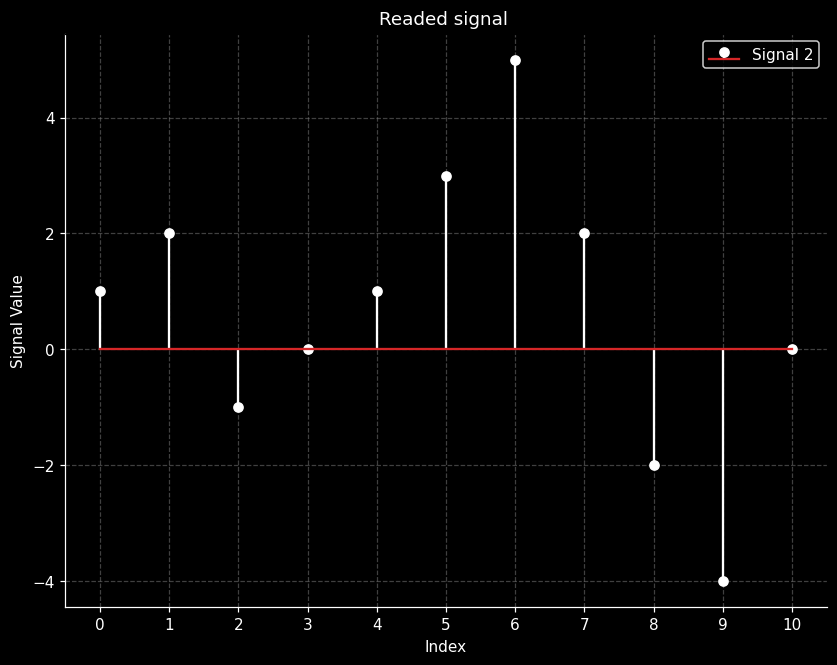

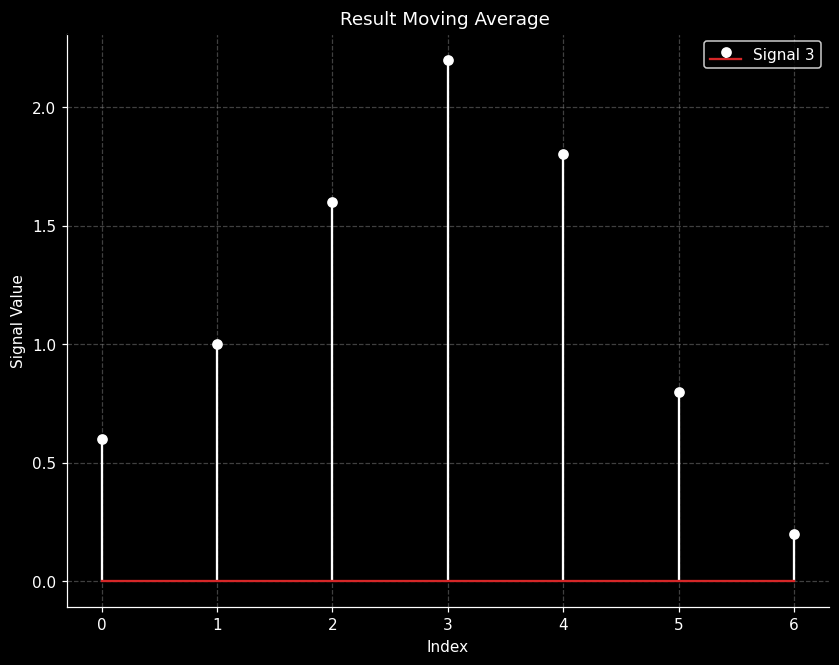

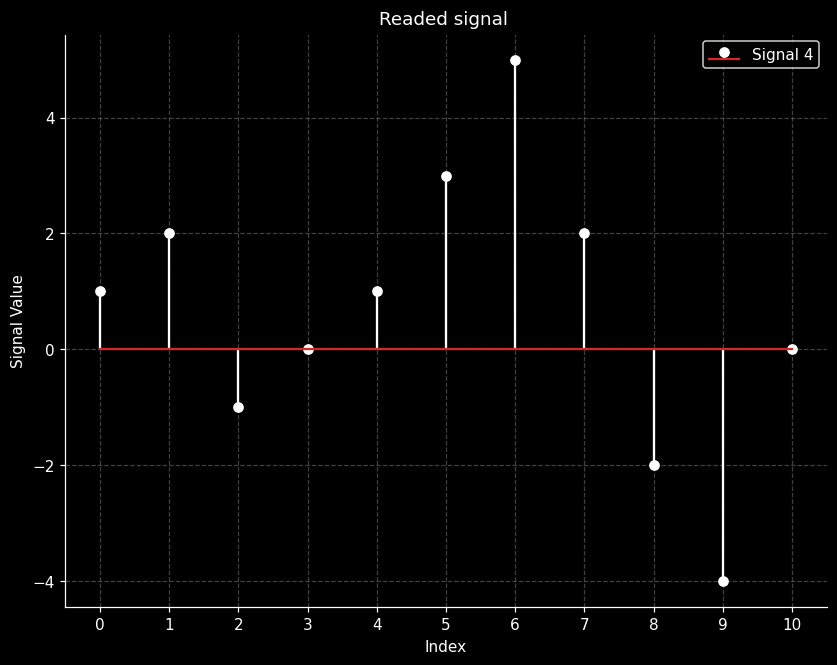

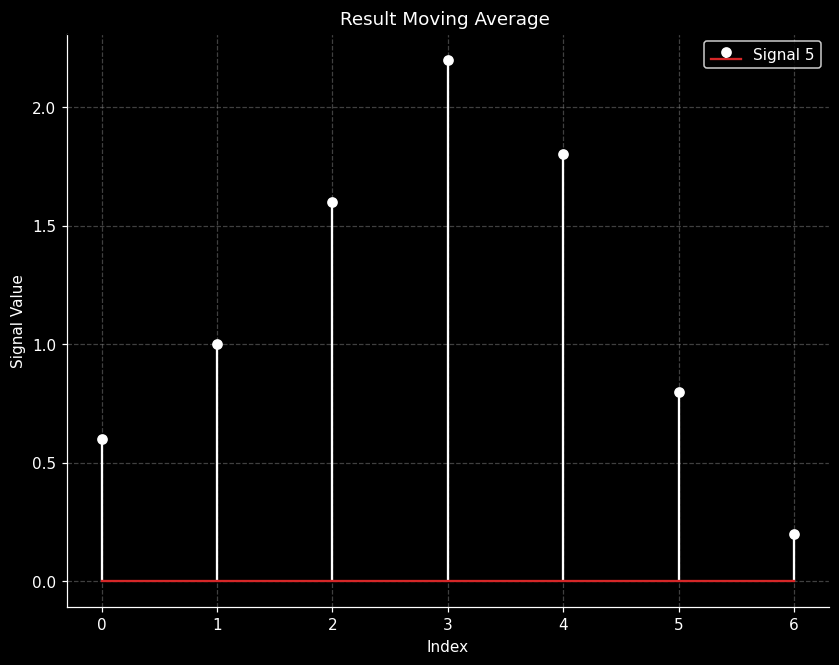

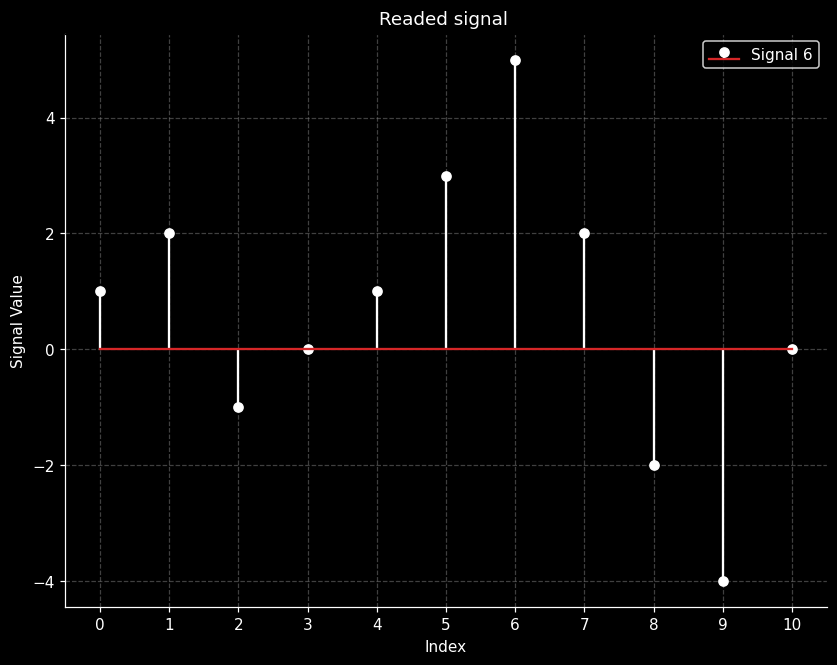

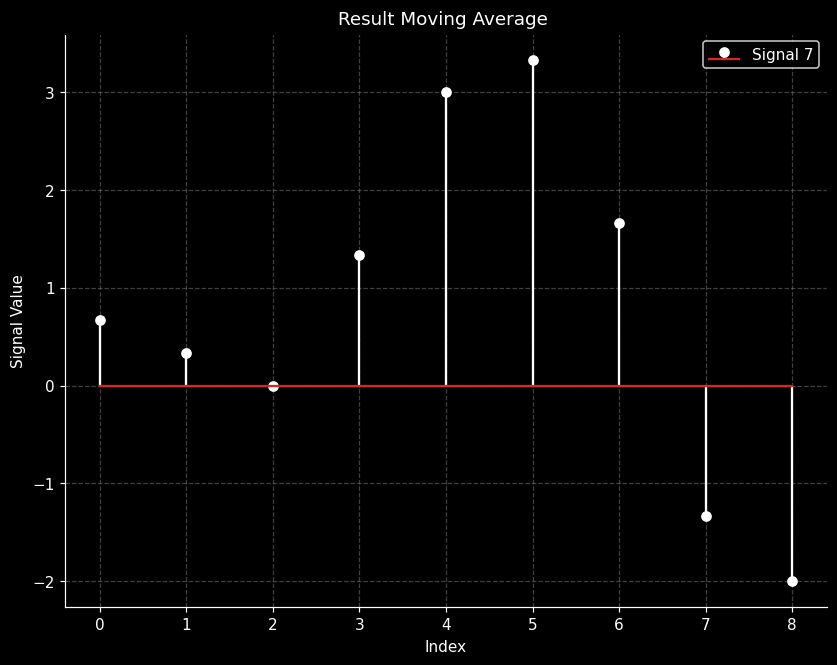

In [155]:

sv_ttk.set_theme("dark")
root.mainloop()
